# Exploratory Data Analysis (EDA)
In this notebook, we gain insights into our dataset.
- What percentage of the issues are duplicates?
- How is the number of duplicate count distributed?
- What is the diversity of corpus? (Using Type-Token Ratio)
- Unigram, Bigram, Trigram counts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

import nltk
from nltk import ngrams
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_pickle('../data/mozilla_firefox.pkl')
df.head()

,Issue_id,Priority,Component,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,Content,Duplicated_issues,Duplicates_count
33591,335190,--,General,Ctrl+C does not copy,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,unspecified,2006-04-23 18:45:42 -0700,2006-04-23 19:50:22 -0700,Ctrl+C does not copy User-Agent: Mozilla...,"[335186, 334862]",2
21703,294616,--,Menus,Open URL in context menu,User-Agent: Mozilla/5.0 (Windows; U; Win...,RESOLVED,DUPLICATE,unspecified,2005-05-18 02:59:14 -0700,2006-01-19 00:20:44 -0800,Open URL in context menu User-Agent: Moz...,"[236336, 227922, 454518]",3
104453,787029,--,Untriaged,movement was canceled in web page Navigation...,User Agent: Mozilla/5.0 (Windows NT 6.1; WOW64...,RESOLVED,DUPLICATE,14 Branch,2012-08-30 06:12:03 -0700,2012-08-30 06:30:58 -0700,movement was canceled in web page Navigation...,"[651803, 787021, 787022]",3
1900,203901,--,Toolbars and Customization,Folders in Bookmarks Toolbar stay Expanded if ...,User-Agent: Mozilla/5.0 (Windows; U; Win...,VERIFIED,DUPLICATE,unspecified,2003-04-30 03:21:59 -0700,2006-11-13 07:16:57 -0800,Folders in Bookmarks Toolbar stay Expanded if ...,"[197227, 203899, 210910]",3
1898,203898,--,Toolbars and Customization,Folders in Bookmarks Toolbar stay Expanded if ...,User-Agent: Mozilla/5.0 (Windows; U; Win...,VERIFIED,DUPLICATE,unspecified,2003-04-30 03:10:53 -0700,2006-11-13 07:23:00 -0800,Folders in Bookmarks Toolbar stay Expanded if ...,"[197227, 203899, 210910]",3


## What percentage of the issues are duplicates?

In [3]:
total_issues = df['Issue_id'].nunique()
duplicate_issues = df[df['Duplicates_count'].apply(lambda x: x > 0)]['Issue_id'].nunique()
percentage_duplicates = (duplicate_issues / total_issues) * 100
print(f'Percentage of issues that are duplicates: {percentage_duplicates:.2f}%')

Percentage of issues that are duplicates: 13.59%


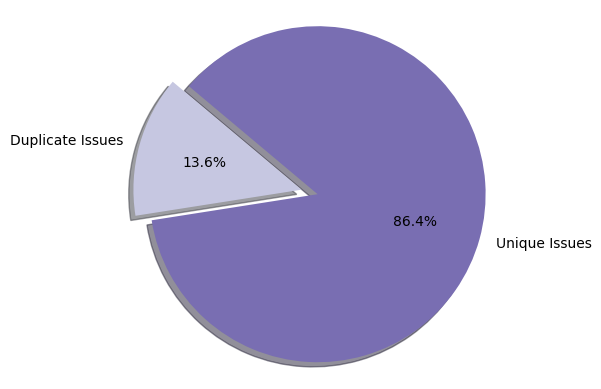

In [4]:
labels = 'Duplicate Issues', 'Unique Issues'
sizes = [duplicate_issues, total_issues - duplicate_issues]
explode = (0.1, 0)

palette = sns.color_palette("Purples", len(sizes))
plt.pie(sizes, explode=explode, labels=labels, colors=palette,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## How is the number of duplicate counts distributed?

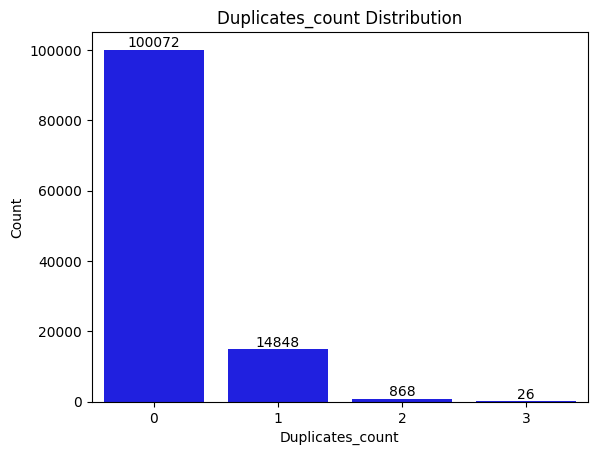

In [5]:
unique_values, counts = np.unique(df['Duplicates_count'], return_counts=True)

count_df = pd.DataFrame({'Duplicates_count': unique_values, 'Count': counts})

sns.barplot(x='Duplicates_count', y='Count', data=count_df, color='blue')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Duplicates_count')
plt.ylabel('Count')
plt.title('Duplicates_count Distribution')
plt.show()

## What is the diversity of corpus?
- Concatenate all the content
- Lemmatize, lowercase, remove stop words
- Compute Type-Token Ratio

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [6]:
all_content = ' '.join(df['Content'].astype(str))
words = word_tokenize(all_content.lower())

types = len(set(words))
total_tokens = len(words)
ttr = types / total_tokens

print(f'Type-Token Ratio: {ttr:.4f}')

Type-Token Ratio: 0.0092


## Unigram, Bigram, Trigram counts

In [ ]:
tokens = words

unigram_counts = Counter(ngrams(tokens, 1))
bigram_counts = Counter(ngrams(tokens, 2))
trigram_counts = Counter(ngrams(tokens, 3))

unigram_df = pd.DataFrame(unigram_counts.most_common(), columns=['unigram', 'count'])
bigram_df = pd.DataFrame(bigram_counts.most_common(), columns=['bigram', 'count'])
trigram_df = pd.DataFrame(trigram_counts.most_common(), columns=['trigram', 'count'])

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=unigram_df, x='count', bins=30, color='blue', ax=axes[0])
axes[0].set_title('Unigram Counts')

sns.histplot(data=bigram_df, x='count', bins=30, color='blue', ax=axes[1])
axes[1].set_title('Bigram Counts')

sns.histplot(data=trigram_df, x='count', bins=30, color='blue', ax=axes[2])
axes[2].set_title('Trigram Counts')

plt.tight_layout()
plt.show()